In [2]:
library('igraph')
library('Matrix')
library('pracma')

Problem 1.1
===

problem1.1(a)
---

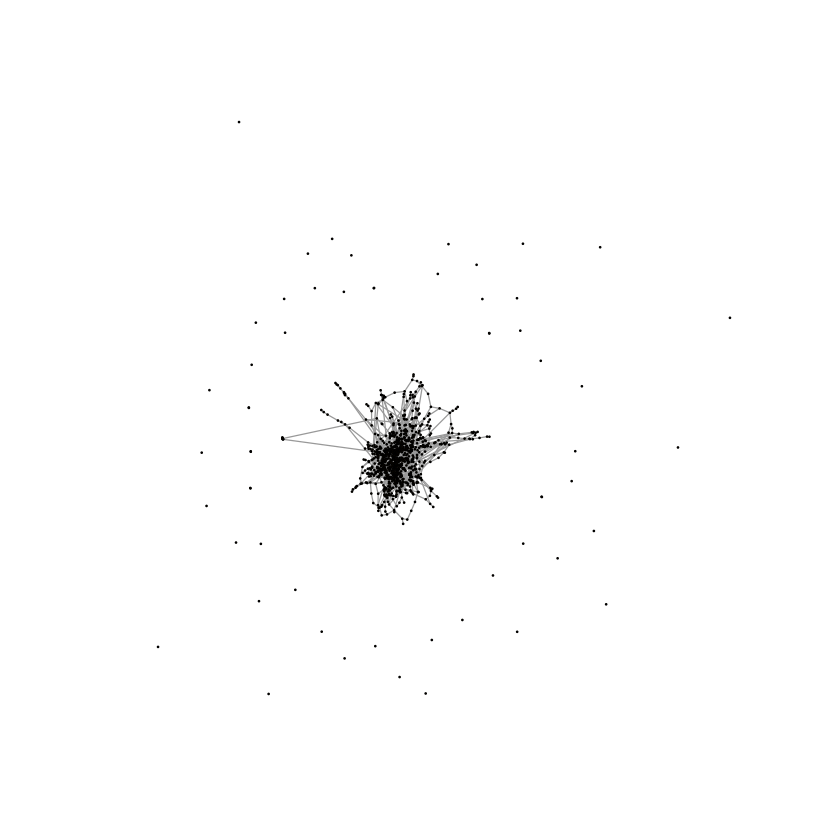

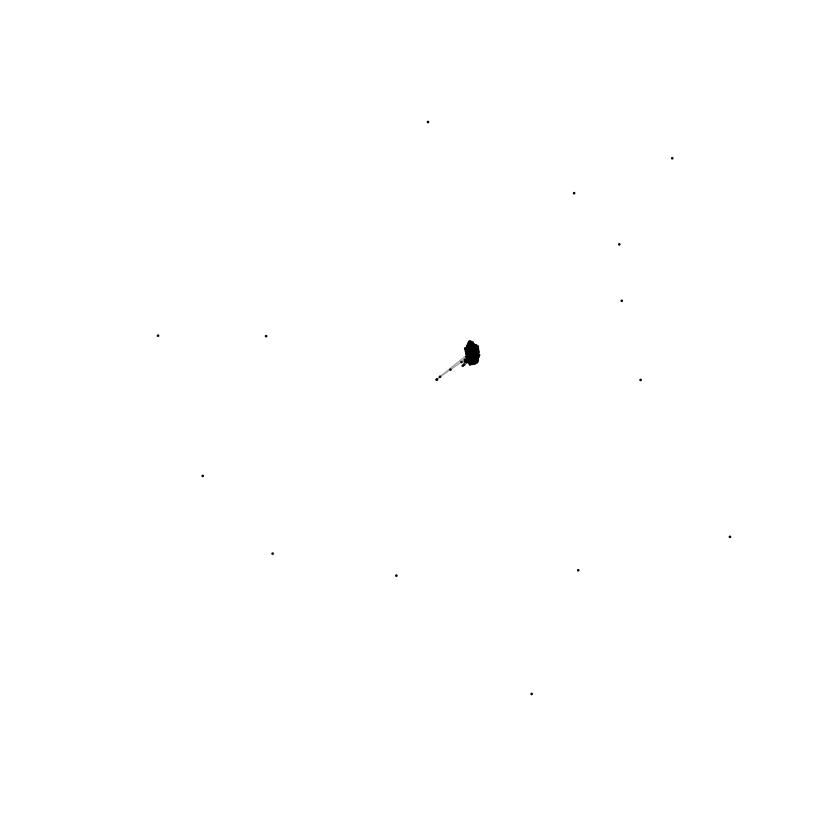

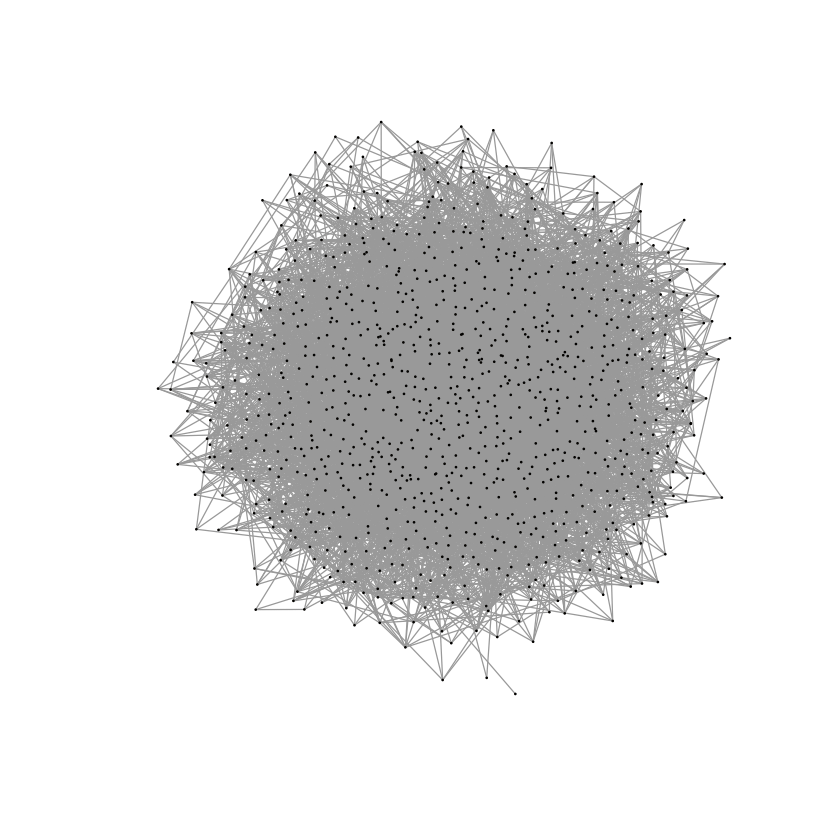

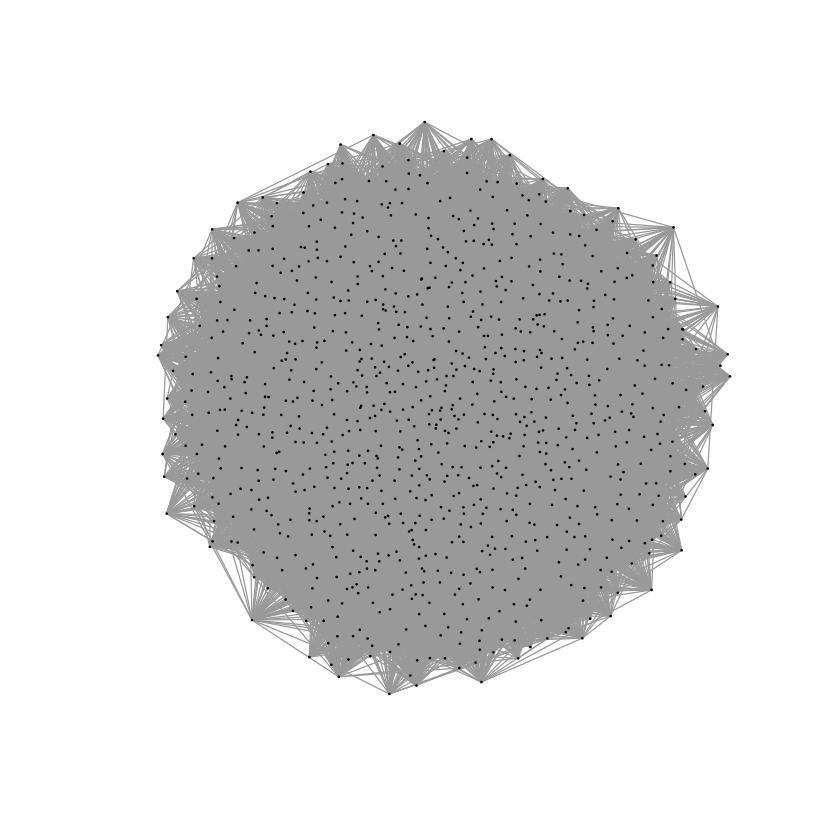

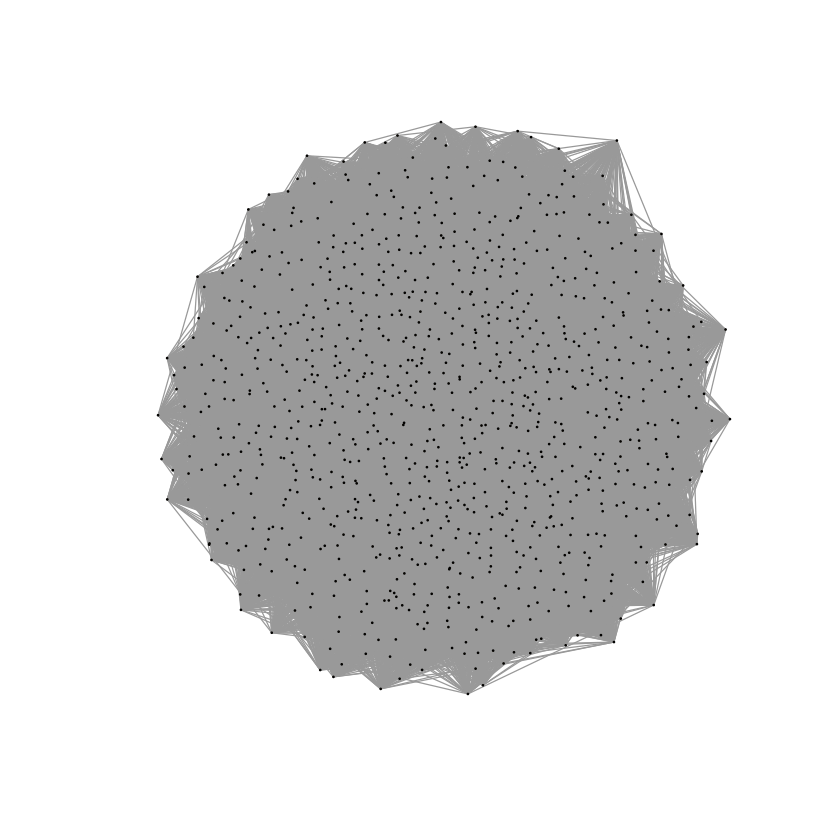

In [19]:
for (i in c(0.003,0.004,0.01,0.05,0.1)){
    p <- i
    g <- erdos.renyi.game(1000, p, directed=F)
    plot(g,vertex.size=0.5, vertex.label.cex=0.001)
}

problem1.1(b)
---

In [26]:
for (i in c(0.003,0.004,0.01,0.05,0.1)){
    p <- i
    g <- erdos.renyi.game(1000, p, directed=F)
    print(diameter(g, directed = F, unconnected = TRUE))
}

[1] 15
[1] 11
[1] 5
[1] 3
[1] 3


problem1.1(c)
---

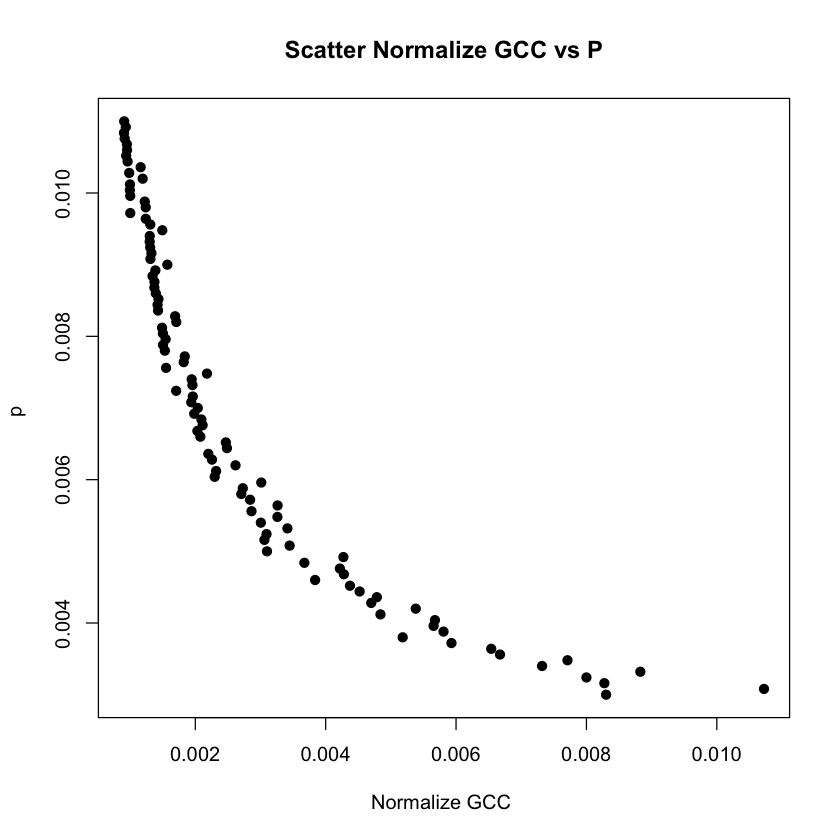

In [4]:
res_gcc = c() 
prob = seq(0.003,0.011,0.00008)
for (i in 1:101){
    prob_c = prob[i]
    g <- erdos.renyi.game(1000, prob_c, directed=F)
    frac <- diameter(g, directed = F, unconnected = TRUE)/gsize(g)
    res_gcc[i] <- frac
}

plot(res_gcc, prob, main="Scatter Normalize GCC vs P", xlab="Normalize GCC ", ylab="p ", pch=19)

problem1.1(d)
---

[1]    1 9901
[1]    1 9901


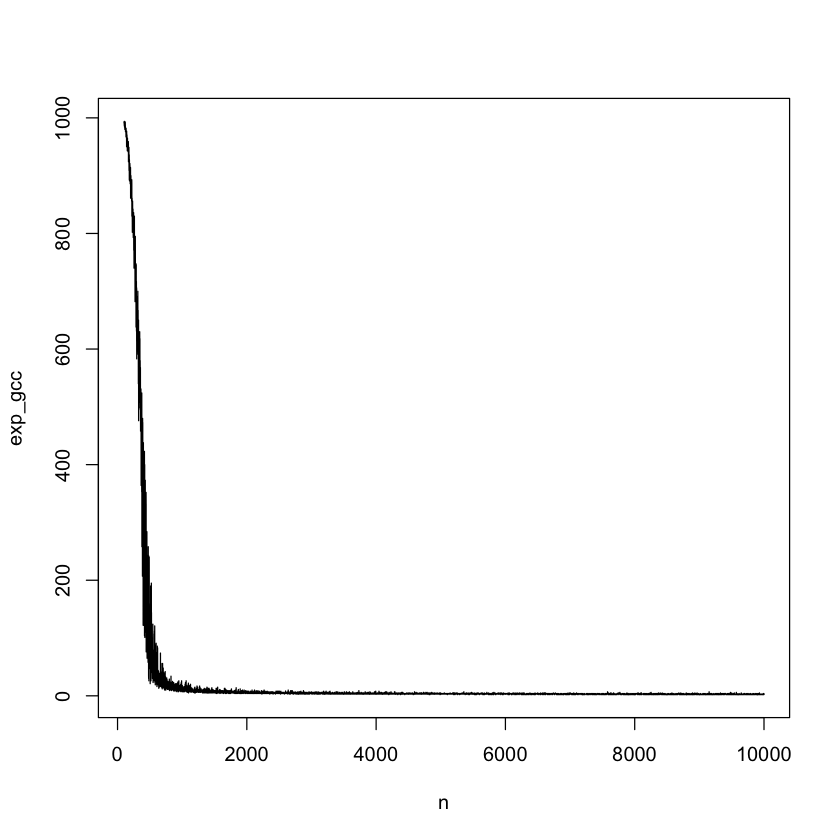

In [22]:
exp_gcc <- c()
n <- seq(100,10000,1)
for (i in 1:9901){
    n_c <- n[i]
    p <- 0.5/n_c
    g <- erdos.renyi.game(1000, p, directed=F)
    clu <- components(g)
    exp_gcc[i] <- max(clu$csize)
}
print(size(n))
print(size(exp_gcc))
plot(n,exp_gcc,type='l')


[1]    1 9901
[1]    1 9901


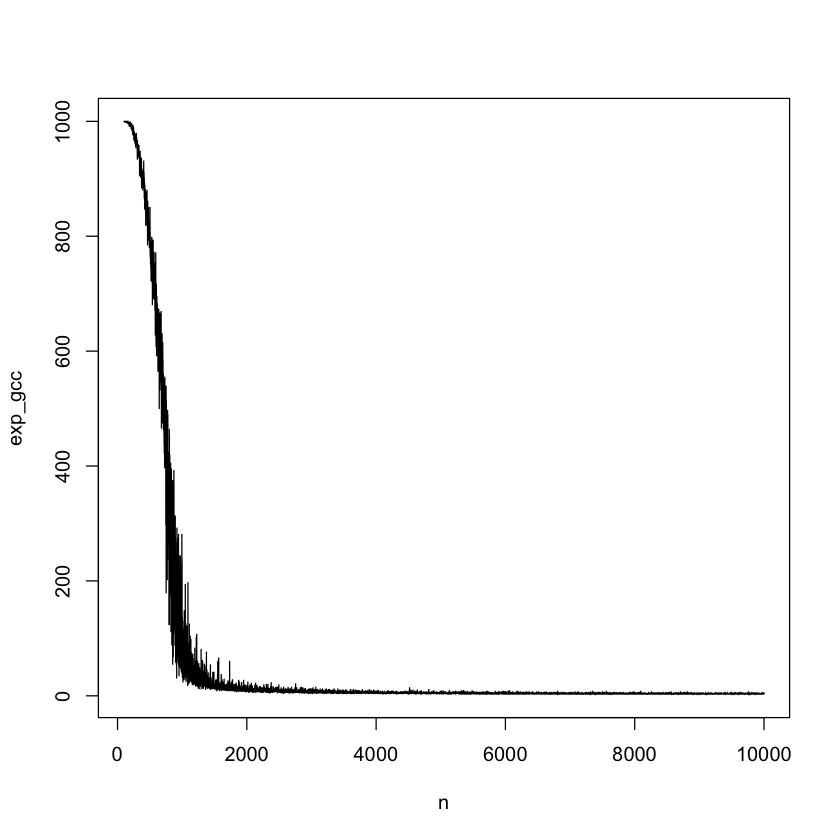

In [23]:
exp_gcc <- c()
n <- seq(100,10000,1)
for (i in 1:9901){
    n_c <- n[i]
    p <- 1/n_c
    g <- erdos.renyi.game(1000, p, directed=F)
    clu <- components(g)
    exp_gcc[i] <- max(clu$csize)
}
print(size(n))
print(size(exp_gcc))
plot(n,exp_gcc,type='l')

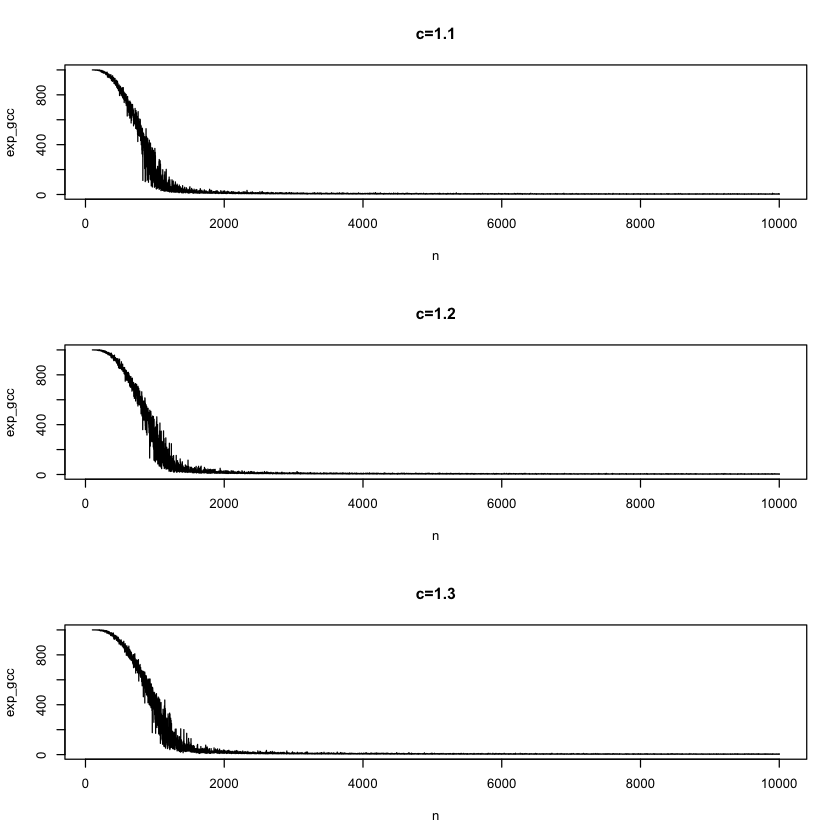

In [31]:
library(plotly)

par(mfrow=c(3,1)) 
exp_gcc <- c()
n <- seq(100,10000,1)
for (i in 1:9901){
    n_c <- n[i]
    p <- 1.1/n_c
    g <- erdos.renyi.game(1000, p, directed=F)
    clu <- components(g)
    exp_gcc[i] <- max(clu$csize)
}
plot(n,exp_gcc,type='l',main="c=1.1")

exp_gcc <- c()
for (i in 1:9901){
    n_c <- n[i]
    p <- 1.2/n_c
    g <- erdos.renyi.game(1000, p, directed=F)
    clu <- components(g)
    exp_gcc[i] <- max(clu$csize)
}
plot(n,exp_gcc,type='l',main="c=1.2")

exp_gcc <- c()
for (i in 1:9901){
    n_c <- n[i]
    p <- 1.3/n_c
    g <- erdos.renyi.game(1000, p, directed=F)
    clu <- components(g)
    exp_gcc[i] <- max(clu$csize)
}
plot(n,exp_gcc,type='l',main="c=1.3")


Problem1.2
===

problem1.2(a)
---

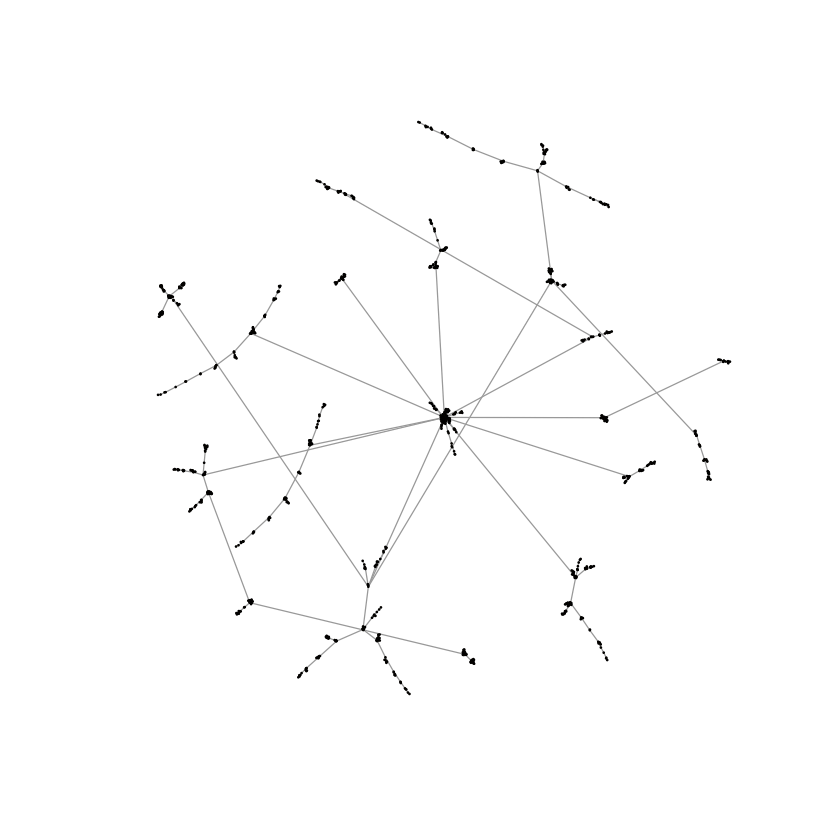

In [4]:
g <- barabasi.game(1000, m=1, directed=F)
plot(g,vertex.size=0.5, vertex.label.cex=0.001)

problem1.2(b)
---

In [9]:
fg <- fastgreedy.community(g)
modularity(g,membership(fg))

[1] 0.928968

problem1.2(c)
---

In [10]:
g <- barabasi.game(10000, m=1, directed=F)
fg <- fastgreedy.community(g)
modularity(g,membership(fg))

[1] 0.9777157

problem1.2(d)
---

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“17 y values <= 0 omitted from logarithmic plot”Warning message in xy.coords(x, y, xlabel, ylabel, log):
“25 y values <= 0 omitted from logarithmic plot”

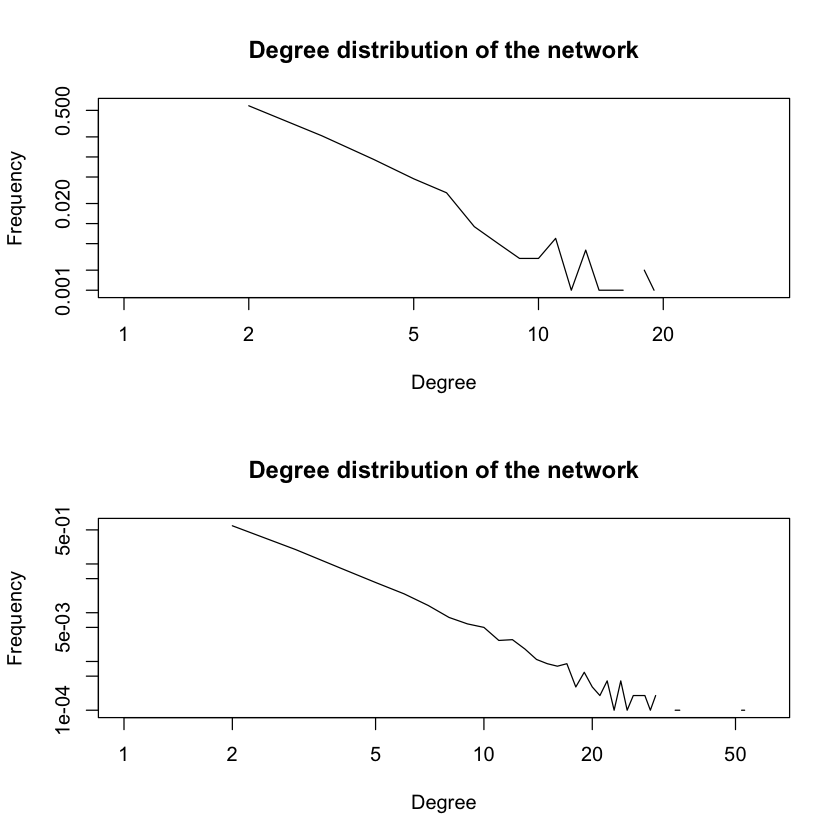

In [95]:
par(mfrow=c(2,1))

g <- barabasi.game(1000, m=1, directed=F)
plot(degree.distribution(g),main="Degree distribution of the network",xlab="Degree",ylab="Frequency",log="xy",type="l")
g <- barabasi.game(10000, m=1, directed=F)
plot(degree.distribution(g),main="Degree distribution of the network",xlab="Degree",ylab="Frequency",log="xy",type="l")


problem1.2(e)
---

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
[51] 51 52 53 54 55 56 57 58 59 60

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“25 y values <= 0 omitted from logarithmic plot”

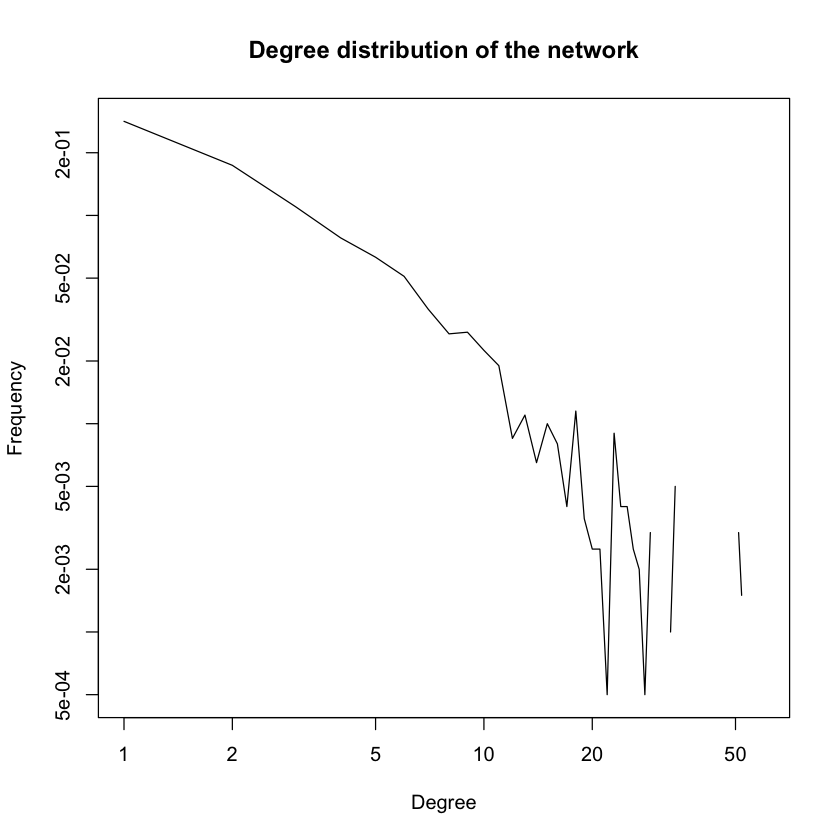

In [96]:
degrees <- degree(g)

set.seed(3)
points <- sample(vcount(g), 2000)
num_d <- rep(0,size(degree.distribution(g))[2])
dis_d <- rep(0,size(degree.distribution(g))[2])
for (point in points){
    neighbs <- neighbors(g,point)
    neighb <- sample(neighbs,1)
    degree <- degrees[neighb]
    num_d[degree] <- num_d[degree]+1
}

length <- 1:size(degree.distribution(g))[2]
for (i in length){
    dis_d[i] <- num_d[i]/sum(num_d)
}
plot(length,dis_d,main="Degree distribution of the network",xlab="Degree",ylab="Frequency",log="xy",type="l")

problem1.2(f)
---

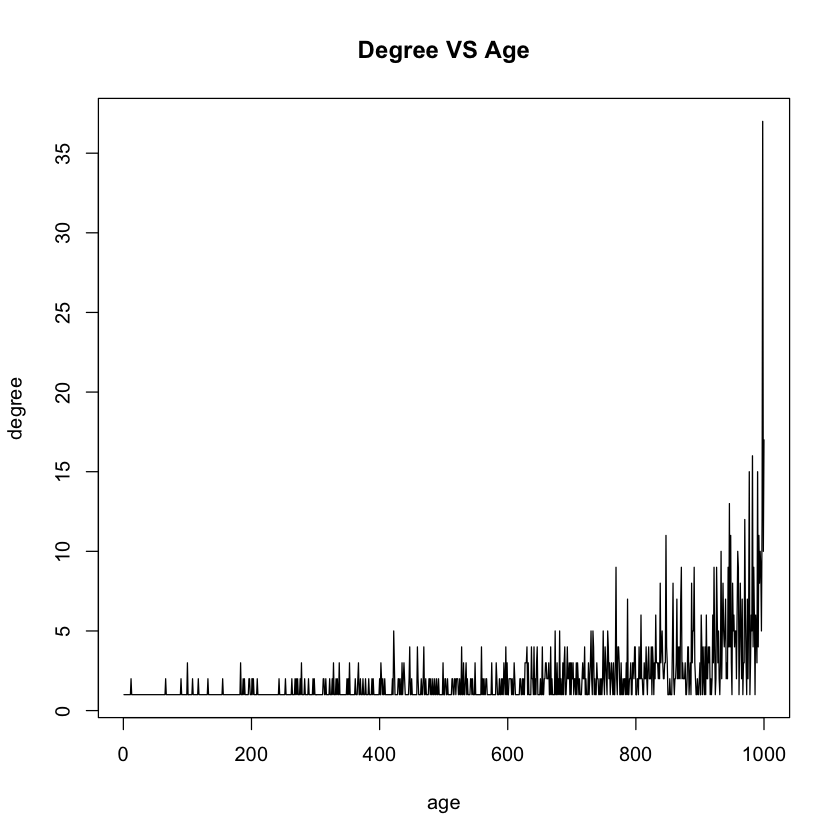

In [85]:
g <- barabasi.game(1000, m=1, directed=F)
plot(1000:1,degree(g),main="Degree VS Age",xlab="age",ylab="degree",type="l")

problem1.2(g)
---

In [91]:
myfunc <- function(m=1){              # for easy use of m
    g <- barabasi.game(1000, m=m, directed=F)
    plot(g,vertex.size=0.5, vertex.label.cex=0.001)
    fg <- fastgreedy.community(g)
    print(modularity(g,membership(fg)))
    
    g <- barabasi.game(10000, m=m, directed=F)
    fg <- fastgreedy.community(g)
    print(modularity(g,membership(fg)))
    
    par(mfrow=c(2,1))

    g <- barabasi.game(1000, m=m, directed=F)
    plot(degree.distribution(g),main="Degree distribution of the network",xlab="Degree",ylab="Frequency",log="xy",type="l")
    g <- barabasi.game(10000, m=m, directed=F)
    plot(degree.distribution(g),main="Degree distribution of the network",xlab="Degree",ylab="Frequency",log="xy",type="l")

    
    degrees <- degree(g)

    set.seed(3)
    points <- sample(vcount(g), 2000)
    num_d <- rep(0,size(degree.distribution(g))[2])
    dis_d <- rep(0,size(degree.distribution(g))[2])
    for (point in points){
        neighbs <- neighbors(g,point)
        neighb <- sample(neighbs,1)
        degree <- degrees[neighb]
        num_d[degree] <- num_d[degree]+1
    }

    length <- 1:size(degree.distribution(g))[2]
    for (i in length){
        dis_d[i] <- num_d[i]/sum(num_d)
    }
    plot(length,dis_d,main="Degree distribution of the network",xlab="Degree",ylab="Frequency",log="xy",type="l")
    
    g <- barabasi.game(1000, m=m, directed=F)
    plot(1000:1,degree(g),main="Degree VS Age",xlab="age",ylab="degree",type="l")
}



[1] 0.5177007
[1] 0.5316028


Warning message in xy.coords(x, y, xlabel, ylabel, log):
“29 y values <= 0 omitted from logarithmic plot”Warning message in xy.coords(x, y, xlabel, ylabel, log):
“68 y values <= 0 omitted from logarithmic plot”Warning message in xy.coords(x, y, xlabel, ylabel, log):
“68 y values <= 0 omitted from logarithmic plot”

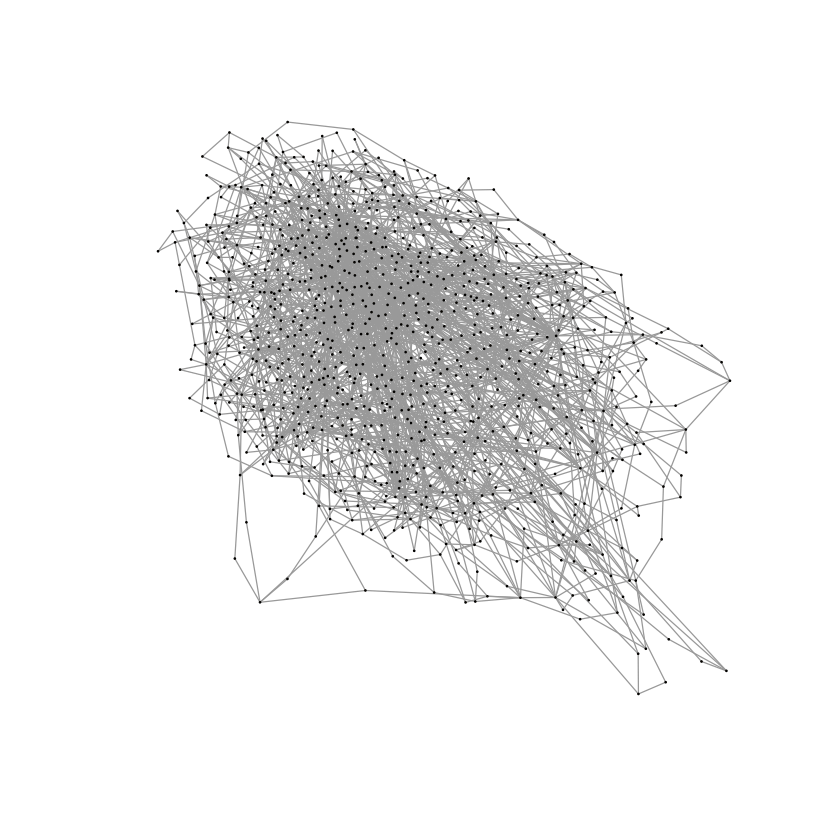

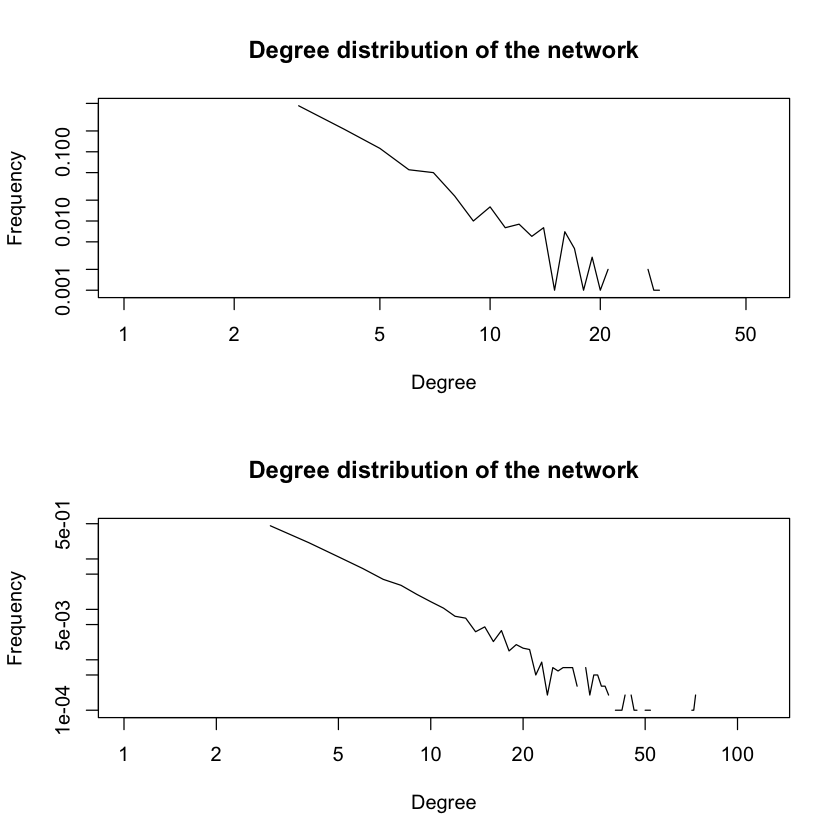

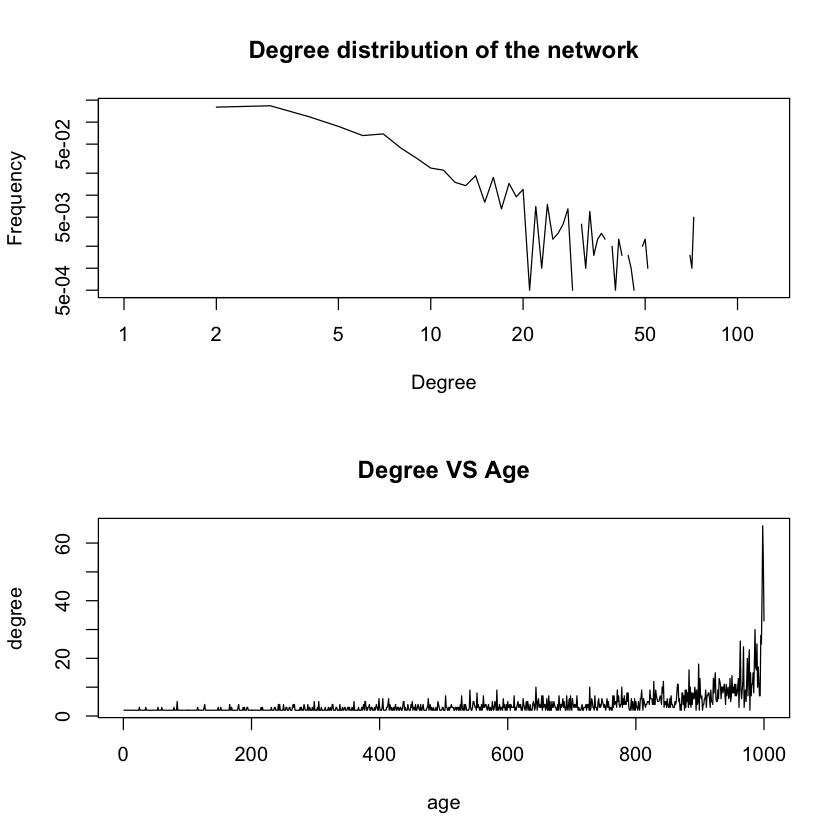

In [92]:
myfunc(2)

[1] 0.2836036
[1] 0.2771484


Warning message in xy.coords(x, y, xlabel, ylabel, log):
“58 y values <= 0 omitted from logarithmic plot”Warning message in xy.coords(x, y, xlabel, ylabel, log):
“240 y values <= 0 omitted from logarithmic plot”Warning message in xy.coords(x, y, xlabel, ylabel, log):
“243 y values <= 0 omitted from logarithmic plot”

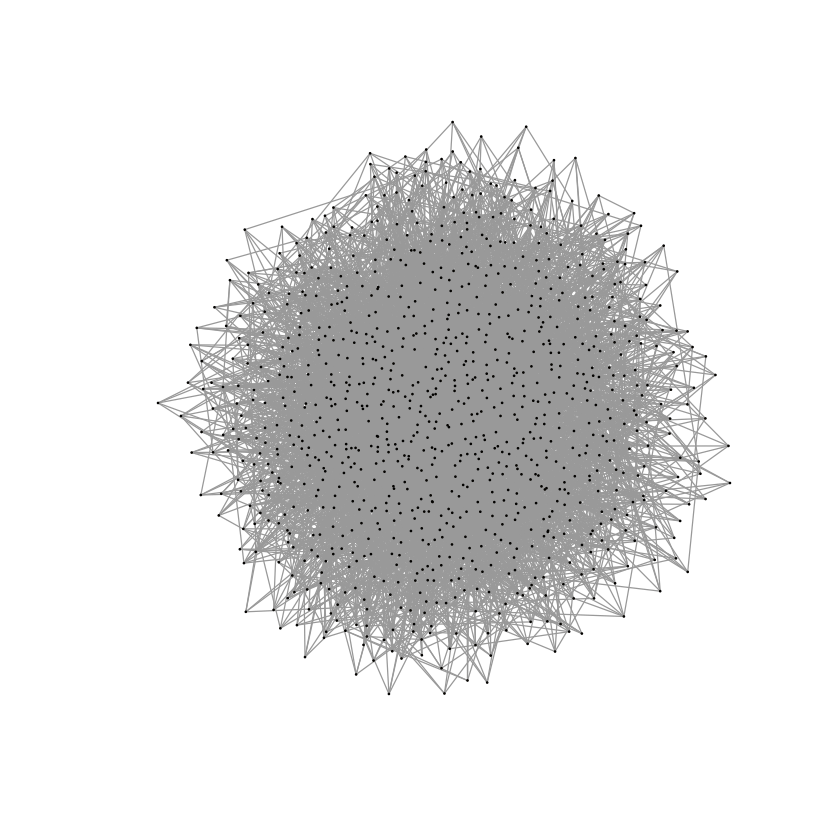

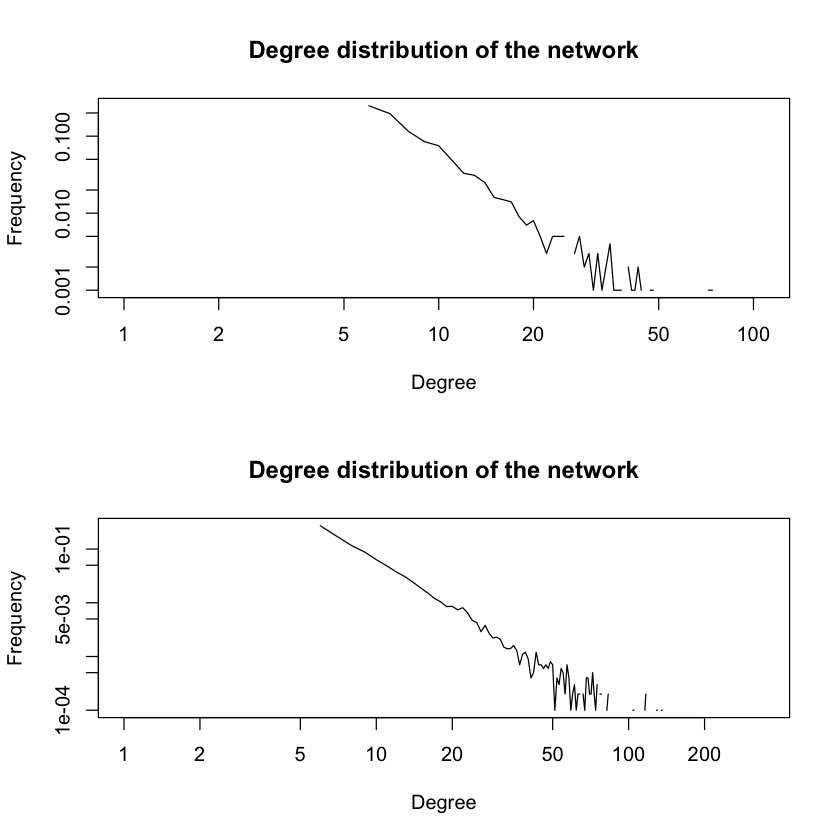

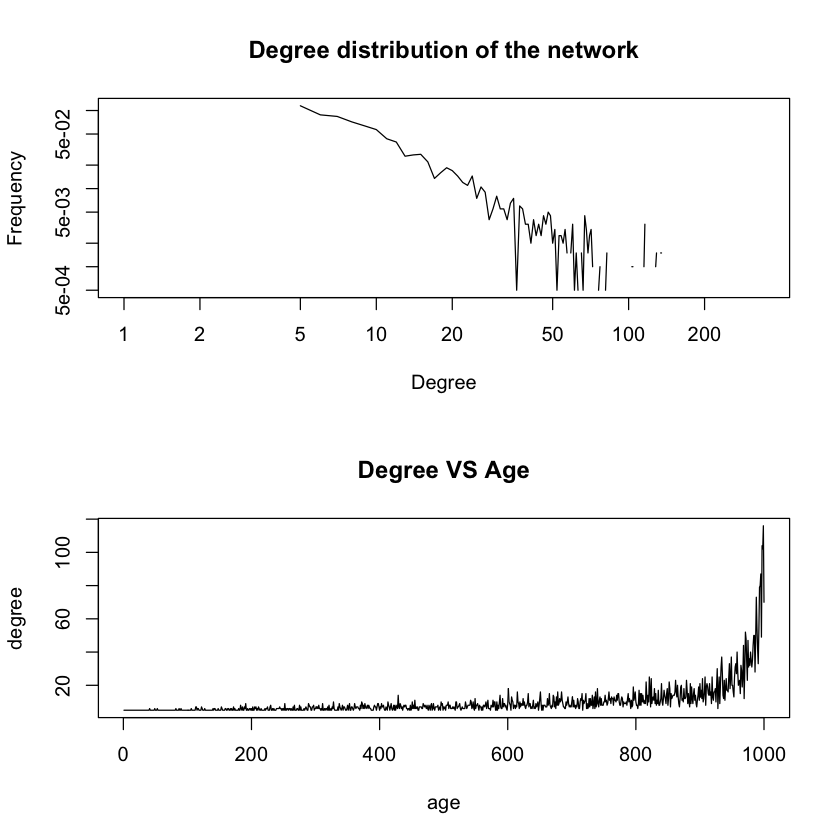

In [93]:
myfunc(5)

problem1.2(h)
---

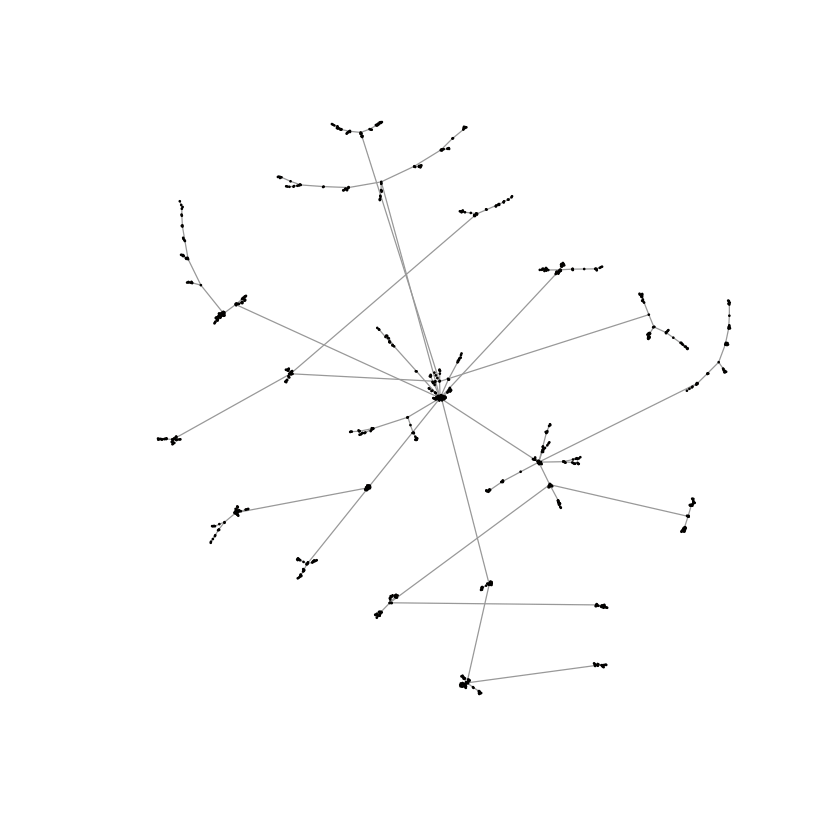

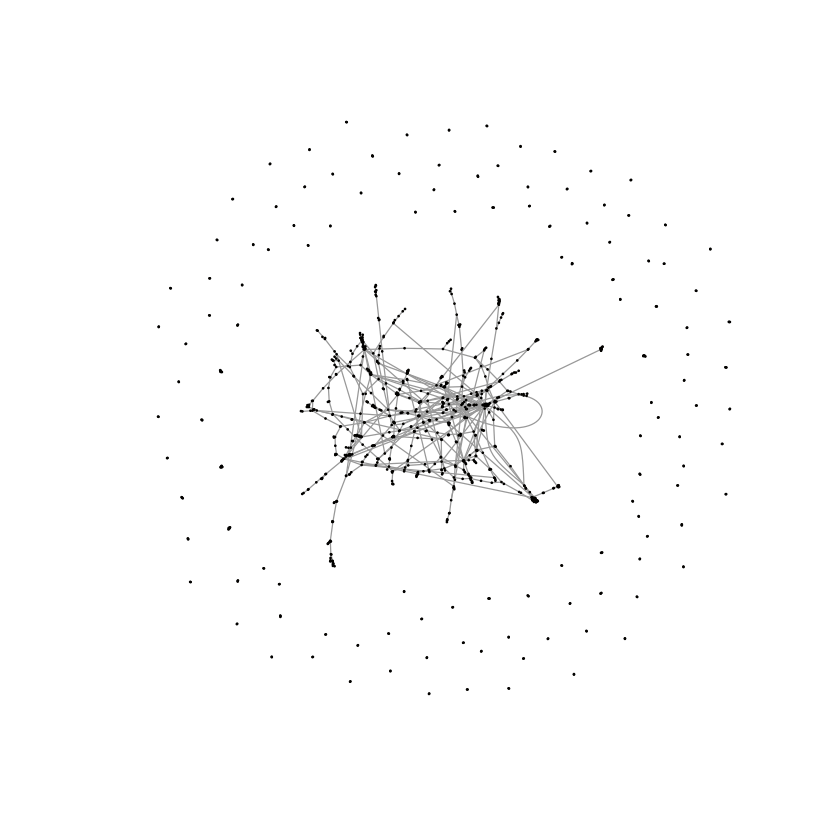

In [105]:
g <- barabasi.game(1000, m=1, directed=F)
plot(g,vertex.size=0.5, vertex.label.cex=0.001)

deg <- sort(degree(g),decreasing = T)
g1 <- degree.sequence.game(deg)
plot(g1,vertex.size=0.5, vertex.label.cex=0.001)